In [2]:
a = 'Python'

il = (a[:-1],'abc')
il

('Pytho', 'abc')

SyntaxError: can't use starred expression here (<ipython-input-3-5dfd481a4e76>, line 1)

In [14]:
z = 1
x = []
num = [i for i in range(0,20)]

for i in num:
    x.append(z)
    z*=i
    
    
x

SyntaxError: invalid syntax (<ipython-input-14-83138818d906>, line 6)

In [12]:
num

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [17]:
from pyknow import Fact

In [18]:
f = Fact(a=1, b=2)

In [21]:
f['a']

1

In [23]:
f = Fact('x','y',a=1,b=2)

In [24]:
f[0]

'x'

In [25]:
f[1]

'y'

In [29]:
f['b']

2

In [30]:
class MyFact(Fact):
    pass

In [32]:
MyFact(f)

MyFact(<frozendict {0: 'x', 1: 'y', 'a': 1, 'b': 2}>)

In [38]:
import numpy as np

In [40]:
sum([1,2,3,4,5])

15

In [47]:
def mydecorator(f):
    def wrapper():
        print("inside decorator before func")
        f()
        print("inside decorator after func")
    return wrapper

@mydecorator
def printname():
    print('Akshay')

In [48]:
printname()

inside decorator before func
Akshay
inside decorator after func


In [ ]:
@Rule(MyFact())  # This is the LHS
def match_with_every_myfact():
    """This rule will match with every instance of `MyFact`."""
    # This is the RHS
    pass

In [367]:
statements = [['i like this phone','phone not to shabby'],['i hate this device','not really usable']]

In [368]:
from sklearn.feature_extraction.text import CountVectorizer

cnt = CountVectorizer()

In [371]:
cnt.fit([i for sublist in statements for i in sublist])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [372]:
def make_readable(f):
    def wrapper(*args,**kwargs):
        print("Readable format :")
        cols = list(dict(sorted(cnt.vocabulary_.items(), key=lambda x:x[1])).keys())
        df = pd.DataFrame(columns=cols)
        x = f(*args,**kwargs)
        for i in range(x.shape[0]):
            df.loc[i] = x[i]
        return df
    return wrapper

In [373]:
def avg_embeddings(f):
    def wrapper(*args, **kwargs):
        x = f(*args,**kwargs)
        x1 = np.mean(x, axis=0).reshape(1,10)
        return x1
    return wrapper

In [374]:
@make_readable
@avg_embeddings
def get_sentence_embeddings(comments):
    return cnt.transform(comments).toarray()

In [376]:
[get_sentence_embeddings(i) for i in statements]

Readable format :
Readable format :


[   device  hate  like  not  phone  really  shabby  this   to  usable
 0     0.0   0.0   0.5  0.5    1.0     0.0     0.5   0.5  0.5     0.0,
    device  hate  like  not  phone  really  shabby  this   to  usable
 0     0.5   0.5   0.0  0.5    0.0     0.5     0.0   0.5  0.0     0.5]

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame({'col1':[1,2,3], 'col2':[1,0,0], 'col3':[1,0,0]})

In [4]:
df

,col1,col2,col3
0,1,1,1
1,2,0,0
2,3,0,0


,value_counts
0,4
1,3
2,1
3,1


In [36]:
img = np.random.random((4,4,3))
img

array([[[0.04612523, 0.7076162 , 0.0077522 ],
        [0.95218088, 0.48891562, 0.04766992],
        [0.28984489, 0.49045226, 0.66813344],
        [0.83308677, 0.15540987, 0.37064375]],

       [[0.99815238, 0.76337319, 0.77432304],
        [0.59248832, 0.6646004 , 0.40680268],
        [0.47610131, 0.79314052, 0.23590698],
        [0.26205002, 0.14437162, 0.88849931]],

       [[0.37773638, 0.73637243, 0.18386754],
        [0.59428725, 0.90606256, 0.34678647],
        [0.27745484, 0.32770843, 0.75953475],
        [0.06070188, 0.63356902, 0.80353941]],

       [[0.94564578, 0.75601306, 0.83159874],
        [0.80336703, 0.74640845, 0.91632327],
        [0.9427936 , 0.14277121, 0.37661809],
        [0.76609366, 0.98227002, 0.65687497]]])

In [38]:
img.reshape((4*4,3))

array([[0.04612523, 0.7076162 , 0.0077522 ],
       [0.95218088, 0.48891562, 0.04766992],
       [0.28984489, 0.49045226, 0.66813344],
       [0.83308677, 0.15540987, 0.37064375],
       [0.99815238, 0.76337319, 0.77432304],
       [0.59248832, 0.6646004 , 0.40680268],
       [0.47610131, 0.79314052, 0.23590698],
       [0.26205002, 0.14437162, 0.88849931],
       [0.37773638, 0.73637243, 0.18386754],
       [0.59428725, 0.90606256, 0.34678647],
       [0.27745484, 0.32770843, 0.75953475],
       [0.06070188, 0.63356902, 0.80353941],
       [0.94564578, 0.75601306, 0.83159874],
       [0.80336703, 0.74640845, 0.91632327],
       [0.9427936 , 0.14277121, 0.37661809],
       [0.76609366, 0.98227002, 0.65687497]])

In [29]:
import matplotlib.pyplot as plt

In [31]:
img = plt.imread('/Users/akshay/Desktop/images.png')

In [32]:
img.shape

(225, 225, 3)

In [39]:
a = {"config":"4", "location":"C:\\xyz", "Group":"amcat"}
b = {"config":"4", "location":"C:\\xyz", "Group":"amcat"}
c = {"config":"5", "location":"C:\\mno", "Group":"alien"}
d = {"config":"5", "location":"C:\\mno", "Group":"alien"}

In [42]:
list_dicts = [a,b,c,d]

In [43]:
list_dicts

[{'config': '4', 'location': 'C:\\xyz', 'Group': 'amcat'},
 {'config': '4', 'location': 'C:\\xyz', 'Group': 'amcat'},
 {'config': '5', 'location': 'C:\\mno', 'Group': 'alien'},
 {'config': '5', 'location': 'C:\\mno', 'Group': 'alien'}]

In [59]:
values = np.array([list(i.values()) for i in list_dicts])

In [71]:
uniques = np.unique(values, axis=0)

In [87]:
idx = [[j for j in range(len(values)) if all(values[j]==i)] for i in uniques]
idx

[[0, 1], [2, 3]]

In [88]:
dictXml = {
'a.xml': {"config":"4", "location":"C:\\xyz", "Group":"amcat"},
'c.xml': {"config":"5", "location":"C:\\mno", "Group":"alien"},
'b.xml': {"config":"4", "location":"C:\\xyz", "Group":"amcat"},
'd.xml': {"config":"5", "location":"C:\\mno", "Group":"alien"},
}

In [117]:
new_df = {k:list(v.values()) for k,v in dictXml.items()}
new_df

{'a.xml': ['4', 'C:\\xyz', 'amcat'],
 'c.xml': ['5', 'C:\\mno', 'alien'],
 'b.xml': ['4', 'C:\\xyz', 'amcat'],
 'd.xml': ['5', 'C:\\mno', 'alien']}

In [124]:
dictXml

{'a.xml': {'config': '4', 'location': 'C:\\xyz', 'Group': 'amcat'},
 'c.xml': {'config': '5', 'location': 'C:\\mno', 'Group': 'alien'},
 'b.xml': {'config': '4', 'location': 'C:\\xyz', 'Group': 'amcat'},
 'd.xml': {'config': '5', 'location': 'C:\\mno', 'Group': 'alien'}}

In [129]:
[(k,v) for k,v in dictXml.items()]

[('a.xml', {'config': '4', 'location': 'C:\\xyz', 'Group': 'amcat'}),
 ('c.xml', {'config': '5', 'location': 'C:\\mno', 'Group': 'alien'}),
 ('b.xml', {'config': '4', 'location': 'C:\\xyz', 'Group': 'amcat'}),
 ('d.xml', {'config': '5', 'location': 'C:\\mno', 'Group': 'alien'})]

In [139]:
grid = np.array([ 
[0,2,1,0],
[0,1,0,-1]])

In [140]:
grid

array([[ 0,  2,  1,  0],
       [ 0,  1,  0, -1]])

In [141]:
grid==2

array([[False,  True, False, False],
       [False, False, False, False]])

In [145]:
np.argwhere(grid==2)

array([[0, 1]])

In [153]:
np.argwhere(grid==0)

array([[0, 0],
       [0, 3],
       [1, 0],
       [1, 2]])

In [159]:
from keras.layers import Input, Dense
from keras.models import Sequential

In [157]:
inp = Input((10,))

In [160]:
model = Sequential()

In [ ]:
model.add(Dense())

In [182]:
import time

In [173]:
import sys
import matplotlib.pyplot as plt
import numpy as np

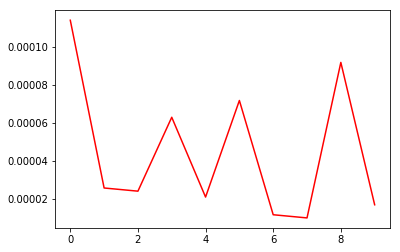

In [222]:
def generate_arrays(shape):
    arr1 = np.random.random(shape)
    arr2 = np.random.random(shape)
    return arr1, arr2

#Method 1:

space = []
timer = []

for i in range(10,10000,1000):
    arrays = generate_arrays((i,1))
    start = time.time()
    arr3 = np.vstack(arrays)
    end = time.time()
    timer.append(end-start)
    space.append(sys.getsizeof(arr3))

plt.plot(timer,'red')

In [168]:
print("** Space:",sys.getsizeof(arr),"bytes")
print("** Time:",sys.getsizeof(arr),"bytes")

80112

In [167]:
arr = np.random.random((10000,1))

In [223]:
import sys

In [234]:
x = np.random.random((1000000,))
y = np.random.random((1000000,))
z = zip(x,y)

In [235]:
sys.getsizeof(z)

64

In [236]:
FileA = [1, 2, 3, 4, 5, 6, 7, 8]
FileB = [1, 3, 4, 6, 8]

In [251]:
delta_z = (i[0] for i in zip(FileA,FileB) if i[0]!=i[1])

In [255]:
[i for i in delta_z]

[2, 3, 4, 5]

In [245]:
delta_z = (i for i in zip(x,y) if i[0]!=i[1])

In [ ]:
plt

Text(0.1, 0.85, 'dummy text')

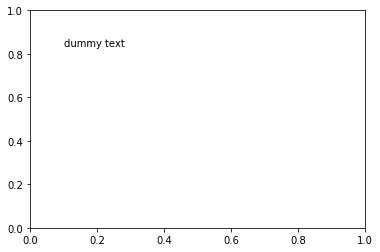

In [258]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
plt.text(0.1, 0.85,'dummy text',horizontalalignment='left',verticalalignment='center',transform = ax.transAxes)

In [259]:
dict1 = [{'a':1, 'b':2, 'c':3}]

In [261]:
l = ['CategoricalEncoder', 'LabelBinarizer', 'LabelEncoder']

In [265]:
for i in l:
    eval(str('from sklearn.preprocessing import '+ i))

SyntaxError: invalid syntax (<string>, line 1)

In [275]:
child = [{'child_id' : 1, 'child_name' : 'matthew' , 'parent_id': 1},
         {'child_id' : 2, 'child_name' : 'luke' , 'parent_id': 1},
         {'child_id' : 3, 'child_name' : 'mark' , 'parent_id': 2}]

parent = [{'parent_id':1, 'parent_name': 'john'},
          {'parent_id':2, 'parent_name': 'paul'}, 
          {'parent_id':3, 'parent_name': 'titus'}]

In [277]:
child_df = pd.DataFrame.from_dict(child)
parent_df = pd.DataFrame.from_dict(parent)

In [280]:
child_df

,child_id,child_name,parent_id
0,1,matthew,1
1,2,luke,1
2,3,mark,2


In [281]:
parent_df

,parent_id,parent_name
0,1,john
1,2,paul
2,3,titus


In [289]:
def get_id(d, key='parent_id'):
    return {d.get('parent_id'):d}
    

In [291]:
[get_id(i) for i in child]

[{1: {'child_id': 1, 'child_name': 'matthew', 'parent_id': 1}},
 {1: {'child_id': 2, 'child_name': 'luke', 'parent_id': 1}},
 {2: {'child_id': 3, 'child_name': 'mark', 'parent_id': 2}}]

In [292]:
[get_id(i) for i in parent]

[{1: {'parent_id': 1, 'parent_name': 'john'}},
 {2: {'parent_id': 2, 'parent_name': 'paul'}},
 {3: {'parent_id': 3, 'parent_name': 'titus'}}]

In [294]:
def fix_dict(ddd):
    return {k: [dic[k] for dic in ddd] for k in ddd[0]}

In [297]:
parent2 = fix_dict(parent)
child2 = fix_dict(child)

In [299]:
parent2

{'parent_id': [1, 2, 3], 'parent_name': ['john', 'paul', 'titus']}

In [300]:
child2

{'child_id': [1, 2, 3],
 'child_name': ['matthew', 'luke', 'mark'],
 'parent_id': [1, 1, 2]}

In [304]:
parent2['child_embed'] = [[i for i in child2.items() if child2['parent_id']==j] for j in parent2['parent_id']]

In [305]:
parent2

{'parent_id': [1, 2, 3],
 'parent_name': ['john', 'paul', 'titus'],
 'child_embed': [[], [], []]}

In [303]:
parent2['parent_id']

[1, 2, 3]

In [308]:
child

[{'child_id': 1, 'child_name': 'matthew', 'parent_id': 1},
 {'child_id': 2, 'child_name': 'luke', 'parent_id': 1},
 {'child_id': 3, 'child_name': 'mark', 'parent_id': 2}]

In [309]:
parent

[{'parent_id': 1, 'parent_name': 'john'},
 {'parent_id': 2, 'parent_name': 'paul'},
 {'parent_id': 3, 'parent_name': 'titus'}]

In [312]:
[j for j in childi['parent_id'] for i in parent]

[1, 2, 3]

In [321]:
parent['child_embed'] = [[j for j in child if j['parent_id']==i['parent_id']] for i in parent]

TypeError: list indices must be integers or slices, not str

In [318]:
[j for j in child if j['child_id']==1]

[{'child_id': 1, 'child_name': 'matthew', 'parent_id': 1}]

In [322]:
a = [[0, 1], [1, 3], [2, 1], [3, 1]]

In [323]:
a

[[0, 1], [1, 3], [2, 1], [3, 1]]

In [333]:
b = [tuple(i) for i in a]

In [336]:
np.unique(a)

array([0, 1, 2, 3])

In [346]:
a0 = [[(i,j[0]) for j in a if i in j] for i in np.unique(a)]

In [353]:
a1 = [[i[0][0],[j[1] for j in i]] for i in a0]

In [354]:
a1

[[0, [0]], [1, [0, 1, 2, 3]], [2, [2]], [3, [1, 3]]]

In [8]:
l = [[1,2,3,4,5,6],
 [7,8,9,10,11,12],
 [13,14,15,16,17,18]]

In [22]:
[item for item in l]

[[1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12], [13, 14, 15, 16, 17, 18]]

In [21]:
[[(i,n) for i,n in enumerate(item)] for item in l]

[[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6)],
 [(0, 7), (1, 8), (2, 9), (3, 10), (4, 11), (5, 12)],
 [(0, 13), (1, 14), (2, 15), (3, 16), (4, 17), (5, 18)]]

In [20]:
[[n if i%3 else 0 for i,n in enumerate(item)] for item in l]

[[0, 2, 3, 0, 5, 6], [0, 8, 9, 0, 11, 12], [0, 14, 15, 0, 17, 18]]

In [24]:
[[(i % 3 and x or 0) for i, x in enumerate(y)] for y in l]

[[0, 2, 3, 0, 5, 6], [0, 8, 9, 0, 11, 12], [0, 14, 15, 0, 17, 18]]

In [25]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


[]

In [26]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14844272483030525908
]
